In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
plt.style.use('ggplot')
import warnings
import itertools
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel('dead data.xlsx')
df.head() #Check out the Data

,id,DEAD_YEAR(Budha),DEAD_YEAR,Age,Sex,BirthYear,NationalityId,Tumbol,District,Province,...,TimeRec,AccSubDist,AccDist,AccProv,AccLat,AccLong,ICD-10,Vehicle,Unnamed: 22,people
0,8722010,2559,2016,47.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,พิษณุโลก,NaN,NaN,V892,ไม่ระบุพาหนะ,NaN,1
1,8722006,2559,2016,48.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,พิษณุโลก,NaN,NaN,V892,ไม่ระบุพาหนะ,NaN,1
2,8722013,2559,2016,48.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,พิษณุโลก,NaN,NaN,V892,ไม่ระบุพาหนะ,NaN,1
3,8722017,2559,2016,48.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,พิษณุโลก,NaN,NaN,V892,ไม่ระบุพาหนะ,NaN,1
4,8721975,2559,2016,49.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,พิษณุโลก,NaN,NaN,V892,ไม่ระบุพาหนะ,NaN,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223545 entries, 0 to 223544
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                223545 non-null  int64         
 1   DEAD_YEAR(Budha)  223545 non-null  int64         
 2   DEAD_YEAR         223545 non-null  int64         
 3   Age               193880 non-null  float64       
 4   Sex               218071 non-null  float64       
 5   BirthYear         16243 non-null   object        
 6   NationalityId     126287 non-null  float64       
 7   Tumbol            34258 non-null   object        
 8   District          78555 non-null   object        
 9   Province          78710 non-null   object        
 10  RiskHelmet        4390 non-null    float64       
 11  RiskSafetyBelt    2066 non-null    float64       
 12  DeadDate          223545 non-null  datetime64[ns]
 13  DateRec           106950 non-null  datetime64[ns]
 14  Time

In [4]:
df['DeadDate'] = pd.to_datetime(df['DeadDate'])
df.head()

,id,DEAD_YEAR(Budha),DEAD_YEAR,Age,Sex,BirthYear,NationalityId,Tumbol,District,Province,...,TimeRec,AccSubDist,AccDist,AccProv,AccLat,AccLong,ICD-10,Vehicle,Unnamed: 22,people
0,8722010,2559,2016,47.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,พิษณุโลก,NaN,NaN,V892,ไม่ระบุพาหนะ,NaN,1
1,8722006,2559,2016,48.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,พิษณุโลก,NaN,NaN,V892,ไม่ระบุพาหนะ,NaN,1
2,8722013,2559,2016,48.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,พิษณุโลก,NaN,NaN,V892,ไม่ระบุพาหนะ,NaN,1
3,8722017,2559,2016,48.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,พิษณุโลก,NaN,NaN,V892,ไม่ระบุพาหนะ,NaN,1
4,8721975,2559,2016,49.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,พิษณุโลก,NaN,NaN,V892,ไม่ระบุพาหนะ,NaN,1


In [5]:
df = df.sort_values(by=['DeadDate'])
df.head() #Sorting the data by DeadDate

,id,DEAD_YEAR(Budha),DEAD_YEAR,Age,Sex,BirthYear,NationalityId,Tumbol,District,Province,...,TimeRec,AccSubDist,AccDist,AccProv,AccLat,AccLong,ICD-10,Vehicle,Unnamed: 22,people
163767,8605700,2554,2011,NaN,1.0,NaN,NaN,ห้างสูง,หนองใหญ่,ชบ,...,19:30:00,หมอนนาง,พนัสนิคม,ชลบุรี,NaN,NaN,NaN,ไม่ระบุพาหนะ,NaN,1
164428,8606358,2554,2011,NaN,1.0,NaN,NaN,ท่าตูม,เมืองมหาสารคาม,มค,...,16:00:00,ลำชี,กิ่ง อ.ฆ้องชัย,กาฬสินธุ์,16.261667,103.458333,NaN,ไม่ระบุพาหนะ,NaN,1
81337,8608956,2554,2011,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,นครสวรรค์,NaN,NaN,NaN,ไม่ระบุพาหนะ,NaN,1
196233,8599005,2554,2011,22.0,1.0,NaN,99.0,ศรีกะอาง,บ้านนา,นย,...,01:00:00,พรหมณี,เมืองนครนายก,นครนายก,NaN,NaN,V892,ไม่ระบุพาหนะ,NaN,1
92135,8608274,2554,2011,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,นครปฐม,NaN,NaN,NaN,ไม่ระบุพาหนะ,NaN,1


In [6]:
accident = df.set_index('DeadDate')
accident.index #Set the DeadDate for index

DatetimeIndex(['2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01',
               ...
               '2021-12-31', '2021-12-31', '2021-12-31', '2021-12-31',
               '2021-12-31', '2021-12-31', '2021-12-31', '2021-12-31',
               '2021-12-31', '2021-12-31'],
              dtype='datetime64[ns]', name='DeadDate', length=223545, freq=None)

In [13]:
y = accident['people'].resample('MS').sum()
y.head() #extract the average number of accidents

DeadDate
2011-01-01    2068
2011-02-01    1859
2011-03-01    1987
2011-04-01    1907
2011-05-01    1763
Freq: MS, Name: people, dtype: int64

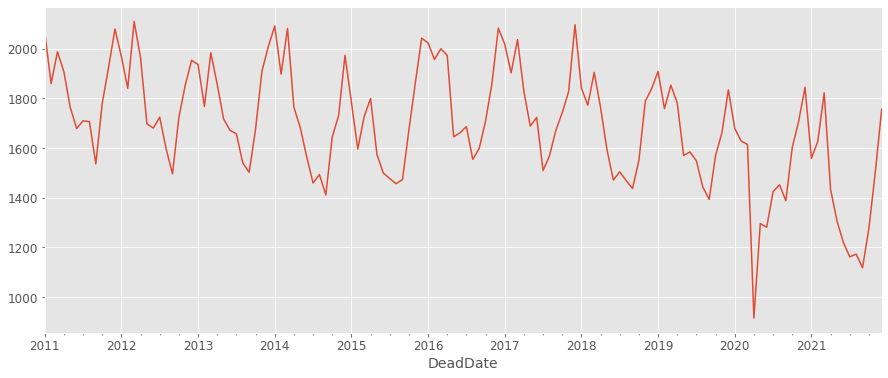

In [14]:
y.plot(figsize=(15, 6))
plt.show() #visualise the average number of accident

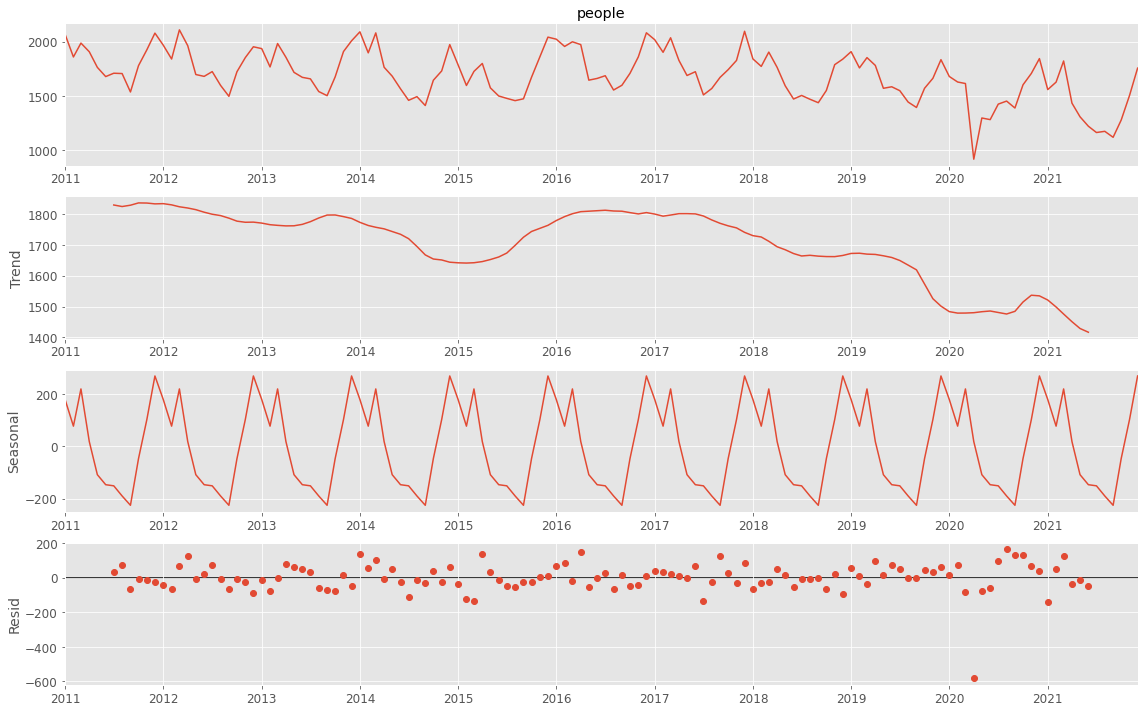

In [15]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show() #visualise the data using time-series

In [16]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [17]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2323.531550083604
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1969.9038845993364
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1553.5203629271034
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1392.7008783870763
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1557.9446711555127
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1517.5842233009619
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1404.0968581946815
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1393.0176505209079
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2137.0216591161643
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1814.9136939342995
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1511.6643853179792
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1345.105697830201
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1530.2989677030878
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1472.266902943415
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1371.0772829430657
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1345.6012866980864
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1692.1751171535907
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1517.019229225

In [18]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1]) #Fitting the Model

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2951      0.137      2.149      0.032       0.026       0.564
ma.L1         -0.7916      0.099     -8.035      0.000      -0.985      -0.599
ar.S.L12      -0.6363      0.121     -5.280      0.000      -0.873      -0.400
sigma2      1.376e+04   1021.744     13.467      0.000    1.18e+04    1.58e+04


C:\Users\Farhan Umudee\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


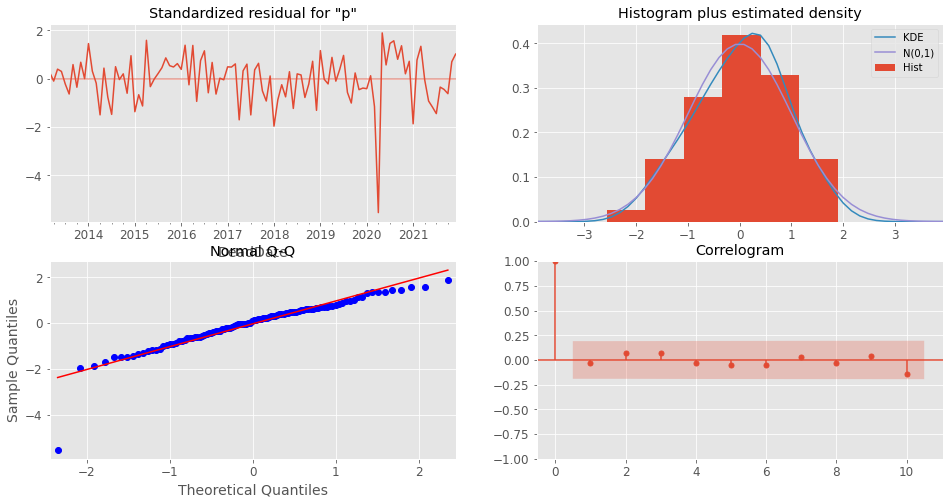

In [19]:
results.plot_diagnostics(figsize=(16, 8))
plt.show() #investigate any unusual behavior

C:\Users\Farhan Umudee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


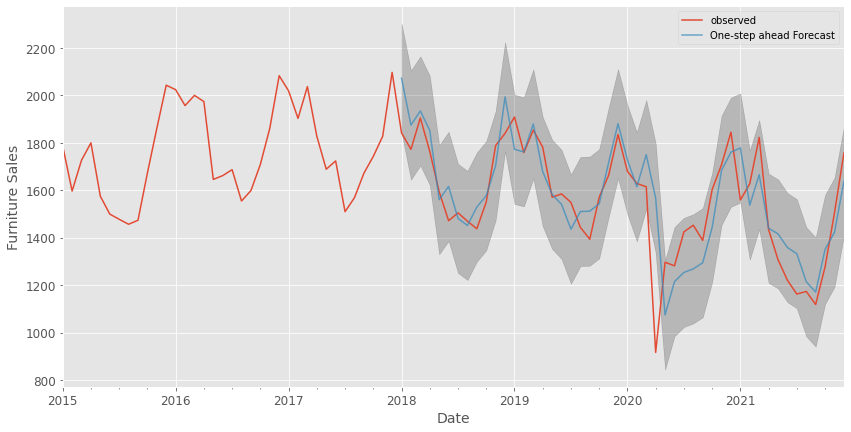

In [20]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show() #Evaluation of Forecasts

In [22]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2))) #find out the MSE

The Mean Squared Error of our forecasts is 20359.14


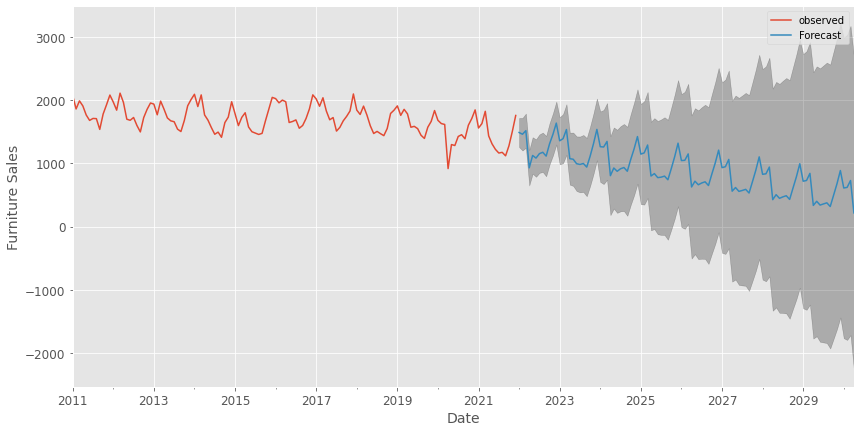

In [23]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show() #Visualising Forecasts